In [43]:
# 신경망 모델 훈련 - 과대 적합을 막는 기법들(자동 하이퍼 파라미터)

In [44]:
# 패션 MNIST - 훈련 세트 & 테스트 세트

In [45]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [46]:
# 모델 생성 함수 - 층 추가가 가능

In [47]:
# 입력, 출력 이외의 층 추가가 없을 수도 있어서 default 값 = None
def model_fn (a_layer = None) :
    
    model = keras.Sequential()
    
    # 입력층
    model.add(keras.layers.Input(shape=(28,28)))

    # 평탄화 (2차원 -> 1차원)
    model.add(keras.layers.Flatten())

    # 은닉층 (밀집층)
    model.add(keras.layers.Dense(100, activation = 'relu'))

    # a_layer가 있을 경우 중간 중간 추가 가능하도록
    if a_layer :

        model.add(a_layer)
    
    # 출력층
    model.add(keras.layers.Dense(10, activation = 'softmax'))

    return model

In [48]:
# Dropout 은닉층 추가

In [49]:
# model = model_fn()

# 30% 비율의 밀집층의 출력을 0으로 랜덤하게 변경
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# 데이터 전처리

In [51]:
train_scaled = train_input / 255
test_scaled = test_input / 255

In [52]:
# 학습

In [53]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# history 객체 return값 = 정확도, 손실률에 대한 각 epoch별 측정 데이터
# history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (test_scaled, test_target))

# dropout 확인 해보니 13 epoch 이후 과대 적합, 13 epoch가 최적 지점
history = model.fit(train_scaled, train_target, epochs = 13, validation_data = (test_scaled, test_target))

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7450 - loss: 0.7300 - val_accuracy: 0.8457 - val_loss: 0.4326
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8460 - loss: 0.4299 - val_accuracy: 0.8585 - val_loss: 0.4016
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8523 - loss: 0.4007 - val_accuracy: 0.8620 - val_loss: 0.3849
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3795 - val_accuracy: 0.8625 - val_loss: 0.3738
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3609 - val_accuracy: 0.8686 - val_loss: 0.3662
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8722 - loss: 0.3461 - val_accuracy: 0.8630 - val_loss: 0.3740
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - loss: 0.3388 - val_accuracy: 0.8740 - val_loss: 0.3539
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8779 - loss: 0.3289 - 

In [54]:
print(history.history.keys())

# 정확도, 손실률

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


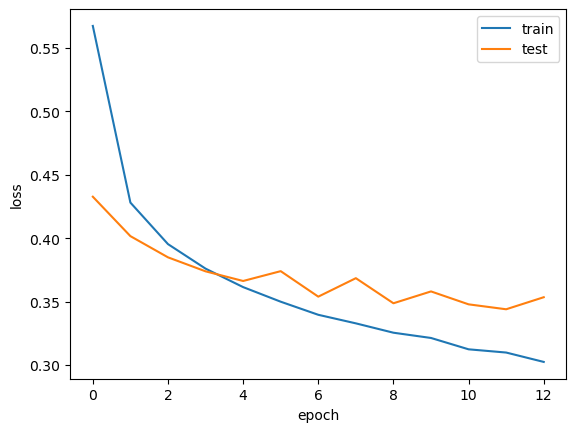

In [55]:
import matplotlib.pyplot as plt

# 학습 세트 손실률
plt.plot(history.history['loss'])

# 테스트 세트 손실률
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'test'])

plt.show()

# 손실률이 급격히 떨어지다가 점점 완만해지는 모습

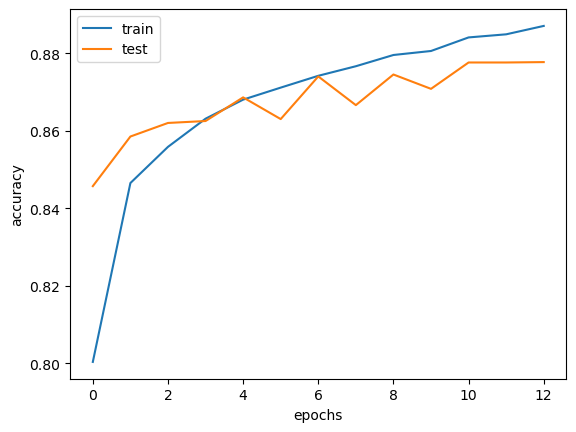

In [56]:
# 학습 세트 정확도
plt.plot(history.history['accuracy'])

# 테스트 세트 정확도
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train', 'test'])

plt.show()

# 정확도가 급격히 오르다가 점점 완만해지는 모습

In [58]:
# 1. 가중치(기울기)만 저장, 2. 모델 전체 저장 save 함수
# Schedule 활용

In [59]:
# 1. 가중치만 저장

In [60]:
# h5 형식 = HDFS (체크포인트, 모델 복구 가능)
# model.save_weights('model.weights.h5')

In [61]:
# 저장해준 모델과 동일한 구성 후 로드시 모델 복구

In [62]:
# model = model_fn(keras.layers.Dropout(0.3))

In [63]:
# 앞서 학습한 13 epoch 가중치 로드

In [64]:
# model.load_weights('model.weights.h5')

In [65]:
# predictions = model.predict(test_scaled)

In [66]:
import numpy as np

# 정답 1, 오답 0
# 정답 평균구해 정확도 구하기
# np.mean(test_target == predictions.argmax(axis = 1))

In [67]:
# 2. 모델 전체 저장 save 함수

In [68]:
model.save('model-whole.keras')

In [69]:
# 저장된 모델 로드

In [70]:
model = keras.models.load_model('model-whole.keras')

In [72]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8771 - loss: 0.3542


[0.3534291088581085, 0.8776999711990356]